In [1]:
import sys
sys.path.append("..")

from src.nn.inference.melody_inference import MelodyInference
from src.data.structures.melody import Melody

In [2]:
audio = "..\\datasets\\melody_extraction\\processed\\test\\audio\\verse_1.wav"
midi = "..\\datasets\\melody_extraction\\processed\\test\\labels\\verse_1.mid"

In [3]:
melody_inference = MelodyInference("..\\src\\nn\\logs\\freqs_dur_model\\checkpoints\\best.ckpt")
melody = melody_inference.extract_melody(audio, tempo=120)
melody.visualize()

Slicing audio: 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


tensor([ 7.7031, 11.8701, 12.8732, 22.7841, 12.9831, 19.4858,  6.7242, 27.8132,
        18.3869,  6.3976,  8.6636,  6.4368, 15.3974, 11.6772,  8.2565,  2.8763,
        10.8495,  3.2238,  3.8219,  4.9204,  7.2151,  7.9366, 13.0089,  8.2983,
        10.0830,  4.2272, 13.9698, 11.4239,  3.2836,  4.9137,  4.3561,  7.8813,
         7.0868,  3.9618,  1.3955,  4.7908,  7.0825,  7.7665, 12.8606,  8.3204,
         9.7642,  4.1318, 13.4163, 11.2550,  3.2004,  4.8600,  4.3515,  7.7029,
         6.9844,  3.8685,  1.3550,  7.9325, 11.7576, 12.0551, 20.0184, 11.3405,
        17.6868,  6.5797, 25.3814, 17.4916,  5.6057,  7.7308,  6.2076, 12.5610,
        10.9968,  7.2204,  2.2545,  9.4571, 11.6281, 17.3735, 17.9365, 30.2777,
        16.7854, 28.9096,  9.6603, 39.5650, 25.9021,  9.4042, 11.6369,  8.4835,
        20.1448, 16.1870, 12.0563,  3.7626, 14.8761,  4.5741,  5.4403, 11.6124,
        17.4667, 17.9867, 29.0305, 16.5522, 28.3778,  9.4904, 38.8953, 25.4749,
         9.1532, 11.0558,  8.6064, 19.81

TypeError: 'numpy.float32' object is not iterable

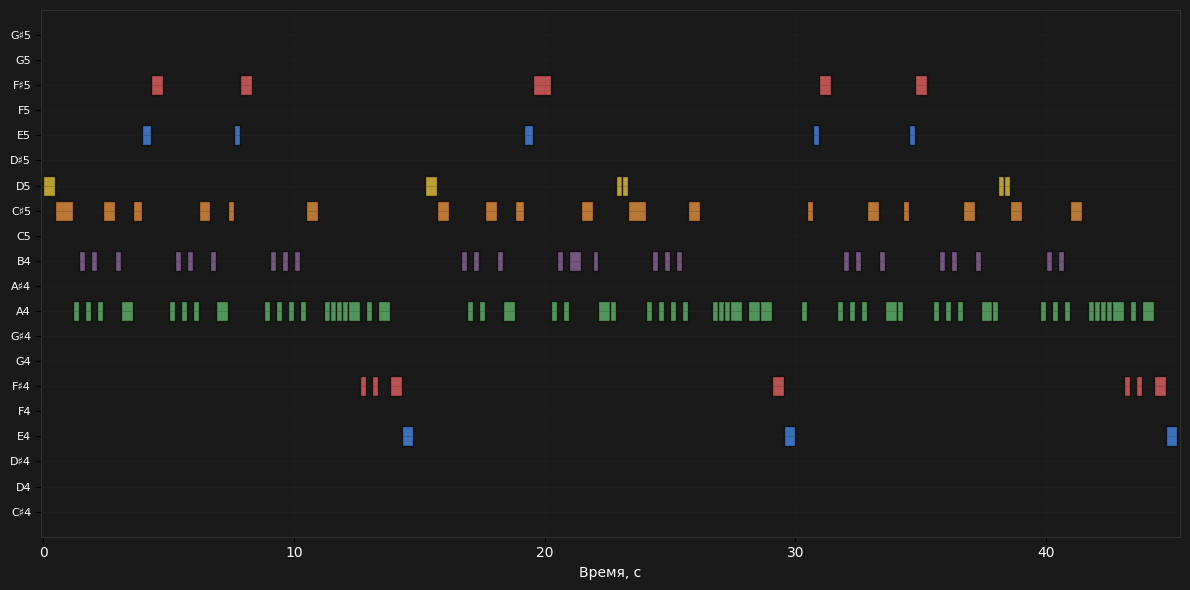

In [18]:
target = Melody.from_midi(midi)
target.visualize()